In [73]:
import pandas as pd
import numpy as np
import wbgapi as wb
import yfinance as yf
import wbgapi as wb
from functools import reduce
import statsmodels.api as sm
from statsmodels.formula.api import logit,ols
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix,confusion_matrix,classification_report
import yfinance as yf
from sklearn.preprocessing import StandardScaler,LabelBinarizer
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.stats as st
import seaborn as sns
import requests
import zipfile
import io

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# HW2



## Q1

There are 22 countries surrounding the Mediterranean Sea: Spain, France, Monaco, Italy, Slovenia, Croatia, Bosnia and Herzegovina, Montenegro, Albania, Greece, Turkey, Syria, Lebanon, Israel, Palestine, Egypt, Libya, Tunisia, Algeria, and Morocco, with two island countries Malta and Cyprus.

1. Get the following data for every country in the list above from the World Bank Data server (using the `wbgapi` library)

- Adult female literacy (SE.ADT.LITR.FE.ZS)
- Adult female workforce participation rate (SL.TLF.ACTI.ZS)
- Child mortality rate (SP.DYN.IMRT.IN)
- Gini index (SI.POV.GINI)
- Life expectancy (SP.DYN.LE00.IN)
- GDP (NY.GDP.PCAP.CD)

2. Write a function that does linear regression for Log(mortality) against the other variables (except mortality).
3. Analyze the regression results for Spain, France, Turkey, Syria, and Israel.
4. Analyze the results for 2 other countries of your choice.

In [2]:
country_codes = [
    "ESP",  # Spain
    "FRA",  # France
    "MCO",  # Monaco
    "ITA",  # Italy
    "SVN",  # Slovenia
    "HRV",  # Croatia
    "BIH",  # Bosnia and Herzegovina
    "MNE",  # Montenegro
    "ALB",  # Albania
    "GRC",  # Greece
    "TUR",  # Turkey
    "SYR",  # Syria
    "LBN",  # Lebanon
    "ISR",  # Israel
    "PSE",  # Palestine
    "EGY",  # Egypt
    "LBY",  # Libya
    "TUN",  # Tunisia
    "DZA",  # Algeria
    "MAR",  # Morocco
    "MLT",  # Malta
    "CYP"   # Cyprus
]

# Data indicators
indicators = {
    "Adult female literacy": "SE.ADT.LITR.FE.ZS",
    "Adult female workforce participation rate": "SL.TLF.ACTI.ZS",
    "Child mortality rate": "SP.DYN.IMRT.IN",
    "Gini index": "SI.POV.GINI",
    "Life expectancy": "SP.DYN.LE00.IN",
    "GDP per capita": "NY.GDP.PCAP.CD"
}

Now, for each indicator,i pulled the data and keep them in a dict form(such that key:indicator namr,value:related df for selected countries)

In [3]:
dataframes = {key: wb.data.DataFrame(value,country_codes) for key, value in indicators.items()}

Let us check one of it:

In [118]:
dataframes['Adult female literacy']

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.300003
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.910492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.099998
CYP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.150002,NaN
DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,75.322968,NaN,NaN,NaN,NaN
EGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.705219,NaN,NaN,NaN,65.505692,NaN,NaN,NaN,NaN,68.949997
ESP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.440536,97.487350,97.547127,97.695358,NaN,97.973778,NaN,98.187042,NaN,NaN
FRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.239998,NaN


We need to format the df in order to prepare the data for the model. \
I defined a function, it reshapes the df such that columns will be: countrycodes(economy),year, and indicator values:

In [7]:
def make_proper(name,df):
    new_df=pd.melt(df.reset_index(), id_vars=df.index.names, var_name='Year', value_name=name)
    new_df['Year']=pd.to_datetime(new_df['Year'].str[2:]).dt.year

    return new_df

In [208]:
formatted_dfs={key: make_proper(key,value) for key, value in dataframes.items()}

In [209]:
formatted_dfs['Adult female literacy']

,economy,Year,Adult female literacy
0,ALB,1960,NaN
1,BIH,1960,NaN
2,CYP,1960,NaN
3,DZA,1960,NaN
4,EGY,1960,NaN
...,...,...,...
1381,PSE,2022,NaN
1382,SVN,2022,NaN
1383,SYR,2022,NaN
1384,TUN,2022,77.879997


In [210]:
nan_counts = {}

for key, df in formatted_dfs.items():
    # Group by 'Country' column and calculate count of NaN values in each group
    nan_counts[key] = df.groupby('economy').apply(lambda x: x.isna().sum())

nan_counts

{'Adult female literacy':          economy  Year  Adult female literacy
 economy                                      
 ALB            0     0                     58
 BIH            0     0                     58
 CYP            0     0                     59
 DZA            0     0                     58
 EGY            0     0                     53
 ESP            0     0                     46
 FRA            0     0                     63
 GRC            0     0                     59
 HRV            0     0                     60
 ISR            0     0                     62
 ITA            0     0                     59
 LBN            0     0                     60
 LBY            0     0                     61
 MAR            0     0                     54
 MCO            0     0                     63
 MLT            0     0                     58
 MNE            0     0                     58
 PSE            0     0                     47
 SVN            0     0            

Now, we are gonna merge them considering indicator and year columns:

In [211]:
merged_df = reduce(lambda x,y: pd.merge(x,y,on=['economy','Year'], how='outer'), formatted_dfs.values())
merged_df.rename(columns={'economy':'Country','Adult female literacy':'Literacy',
                        'Adult female workforce participation rate':'workforce',
                        'Child mortality rate':'mortality','Gini index':'gini',
                        'Life expectancy':'life_exp', 'GDP per capita':'gdp'},inplace=True)

merged_df.sort_values(by=['Country', 'Year'], ascending=[True, True],inplace=True)
merged_df

,Country,Year,Literacy,workforce,mortality,gini,life_exp,gdp
0,ALB,1960,NaN,NaN,NaN,NaN,54.439,NaN
22,ALB,1961,NaN,NaN,NaN,NaN,55.634,NaN
44,ALB,1962,NaN,NaN,NaN,NaN,56.671,NaN
66,ALB,1963,NaN,NaN,NaN,NaN,57.844,NaN
88,ALB,1964,NaN,NaN,NaN,NaN,58.983,NaN
...,...,...,...,...,...,...,...,...
1297,TUR,2018,NaN,57.714,9.2,41.9,77.563,9568.836190
1319,TUR,2019,94.424042,57.710,8.6,41.9,77.832,9215.440875
1341,TUR,2020,NaN,54.048,8.1,NaN,75.850,8638.739133
1363,TUR,2021,NaN,56.321,7.7,NaN,76.032,9743.213131


In [212]:
merged_df.columns

Index(['Country', 'Year', 'Literacy', 'workforce', 'mortality', 'gini',
       'life_exp', 'gdp'],
      dtype='object')

In [213]:
merged_df.isna().sum()

Country         0
Year            0
Literacy     1255
workforce     714
mortality     183
gini         1118
life_exp      118
gdp           332
dtype: int64

(First i dropped all nan rows,but then i realized if i do that, there isnt any record belonging to France etc. Thus i filled some columns,and )

In [214]:
def interpolate_group(group):
    return group.interpolate(method='linear')

# Apply the interpolation function to each group defined by 'group_column'
full_df1 = merged_df.groupby('Country').apply(interpolate_group)
full_df1.isna().sum()

Country        0
Year           0
Literacy     657
workforce    714
mortality    161
gini         813
life_exp      94
gdp          305
dtype: int64

In [215]:
full_df1['Literacy'] = full_df1.groupby('Country')['Literacy'].transform(lambda x: x.bfill().ffill())
full_df1['gini'] = full_df1.groupby('Country')['gini'].transform(lambda x: x.bfill().ffill())
full_df1['workforce'] = full_df1.groupby('Country')['workforce'].transform(lambda x: x.bfill().ffill())
full_df1.isna().sum()

Country        0
Year           0
Literacy     126
workforce     63
mortality    161
gini         126
life_exp      94
gdp          305
dtype: int64

In [216]:
full_df1.groupby('Country').apply(lambda x: x.isna().sum())

,Country,Year,Literacy,workforce,mortality,gini,life_exp,gdp
Country,,,,,,,,
ALB,0,0,0,0,18,0,0,24
BIH,0,0,0,0,24,0,0,34
CYP,0,0,0,0,11,0,0,15
DZA,0,0,0,0,0,0,0,0
EGY,0,0,0,0,0,0,0,5
ESP,0,0,0,0,0,0,0,0
FRA,0,0,63,0,0,0,0,0
GRC,0,0,0,0,0,0,0,0
HRV,0,0,0,0,21,0,0,35


We took the data for almost 63 years and some of entry has no values. If i delete the entire row, i cant have any data about related country. Thus, i will fill them with mean value for that feature, but i will consider this situation in analyzing part

In [217]:
full_df1=full_df1.fillna(full_df1.mean())
full_df1.isna().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_3632\3492409785.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full_df1=full_df1.fillna(full_df1.mean())


Country      0
Year         0
Literacy     0
workforce    0
mortality    0
gini         0
life_exp     0
gdp          0
dtype: int64

In [218]:
full_df1

,Country,Year,Literacy,workforce,mortality,gini,life_exp,gdp
0,ALB,1960,98.252274,69.274,31.691102,27.0,54.439,13526.131663
22,ALB,1961,98.252274,69.274,31.691102,27.0,55.634,13526.131663
44,ALB,1962,98.252274,69.274,31.691102,27.0,56.671,13526.131663
66,ALB,1963,98.252274,69.274,31.691102,27.0,57.844,13526.131663
88,ALB,1964,98.252274,69.274,31.691102,27.0,58.983,13526.131663
...,...,...,...,...,...,...,...,...
1297,TUR,2018,93.961155,57.714,9.200000,41.9,77.563,9568.836190
1319,TUR,2019,94.424042,57.710,8.600000,41.9,77.832,9215.440875
1341,TUR,2020,94.424042,54.048,8.100000,41.9,75.850,8638.739133
1363,TUR,2021,94.424042,56.321,7.700000,41.9,76.032,9743.213131


Now,let us check if independent variables are correlated

In [219]:
full_df1.corr()

,Year,Literacy,workforce,mortality,gini,life_exp,gdp
Year,1.000000,0.282935,0.107573,-0.571527,-0.061779,0.643134,0.245701
Literacy,0.282935,1.000000,0.524419,-0.768909,-0.444349,0.731097,0.170485
workforce,0.107573,0.524419,1.000000,-0.384964,-0.244712,0.469373,0.214480
mortality,-0.571527,-0.768909,-0.384964,1.000000,0.316883,-0.890422,-0.271019
gini,-0.061779,-0.444349,-0.244712,0.316883,1.000000,-0.251873,-0.081584
life_exp,0.643134,0.731097,0.469373,-0.890422,-0.251873,1.000000,0.193801
gdp,0.245701,0.170485,0.214480,-0.271019,-0.081584,0.193801,1.000000


As our dependent variable will be mortality, we should look whether it is highly correlated with other parameters.Life expectancy and mortality are highly correlated,also literacy looks also correlated with mortality, but i will not remove any of them

In [220]:
full_df1["log_mortality"] = np.log(full_df1["mortality"])

In [221]:
def linear_regression(df,country,doesinclude_lit=True):
    if doesinclude_lit==False:
        model = ols("log_mortality ~  workforce+ gdp + gini+ life_exp", data=df[df['Country']==country]).fit()
    else:
        model = ols("log_mortality ~  Literacy + workforce+ gdp + gini+ life_exp", data=df[df['Country']==country]).fit()
    
    return model.summary(),sm.stats.anova_lm(model)
    

In [222]:
linear_regression(full_df1,'TUR')

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          log_mortality   R-squared:                       0.983
 Model:                            OLS   Adj. R-squared:                  0.982
 Method:                 Least Squares   F-statistic:                     660.5
 Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.17e-49
 Time:                        15:39:36   Log-Likelihood:                 41.481
 No. Observations:                  63   AIC:                            -70.96
 Df Residuals:                      57   BIC:                            -58.10
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### Turkey:
When we look at ols results, we can conclude that literacy and gdp can be a significant, although in anova table, we can see that  literacy has the highest statistically significant effect on Child mortality. Also gdp, and then gini and life expectancy.

In [223]:
linear_regression(full_df1,"ESP")

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          log_mortality   R-squared:                       0.993
 Model:                            OLS   Adj. R-squared:                  0.992
 Method:                 Least Squares   F-statistic:                     1569.
 Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.10e-59
 Time:                        15:40:44   Log-Likelihood:                 70.447
 No. Observations:                  63   AIC:                            -128.9
 Df Residuals:                      57   BIC:                            -116.0
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### Spain:
From ols table, we can say that workforce and life expectancy are significant, while in ANOVA table,again literacy has highest effect,and then life expectancy

In [224]:
linear_regression(full_df1,"ISR")

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          log_mortality   R-squared:                       0.985
 Model:                            OLS   Adj. R-squared:                  0.983
 Method:                 Least Squares   F-statistic:                     924.0
 Date:                Sun, 24 Mar 2024   Prob (F-statistic):           8.91e-52
 Time:                        15:42:10   Log-Likelihood:                 54.535
 No. Observations:                  63   AIC:                            -99.07
 Df Residuals:                      58   BIC:                            -88.35
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### Israel:
For Isreal, we can say that except gini, all features looks significant,while anova table says workforce has the highest significance

In [225]:
linear_regression(full_df1,"FRA",False)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          log_mortality   R-squared:                       0.981
 Model:                            OLS   Adj. R-squared:                  0.980
 Method:                 Least Squares   F-statistic:                     748.3
 Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.63e-49
 Time:                        15:43:38   Log-Likelihood:                 61.085
 No. Observations:                  63   AIC:                            -112.2
 Df Residuals:                      58   BIC:                            -101.5
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### France:
For France, as there is no data about literacy, we exclude it.From ols results,workforce and life expectancy looks significant. In ANOVA table, workforce and gdp looks the highest ones.

In [226]:
linear_regression(full_df1,"SYR")

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          log_mortality   R-squared:                       0.989
 Model:                            OLS   Adj. R-squared:                  0.988
 Method:                 Least Squares   F-statistic:                     1053.
 Date:                Sun, 24 Mar 2024   Prob (F-statistic):           8.51e-55
 Time:                        15:45:19   Log-Likelihood:                 83.927
 No. Observations:                  63   AIC:                            -155.9
 Df Residuals:                      57   BIC:                            -143.0
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### Syria:
For Syria, literacy and life expectancy has the highest significange on mortality.

In [228]:
linear_regression(full_df1,"ITA")

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          log_mortality   R-squared:                       0.991
 Model:                            OLS   Adj. R-squared:                  0.990
 Method:                 Least Squares   F-statistic:                     1236.
 Date:                Sun, 24 Mar 2024   Prob (F-statistic):           9.31e-57
 Time:                        15:47:51   Log-Likelihood:                 62.976
 No. Observations:                  63   AIC:                            -114.0
 Df Residuals:                      57   BIC:                            -101.1
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### Italy:
In ols, while life expectancy looks significant,ANOVA table says literacy looks like the most significant one


In [230]:
linear_regression(full_df1,"PSE")

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          log_mortality   R-squared:                       0.774
 Model:                            OLS   Adj. R-squared:                  0.754
 Method:                 Least Squares   F-statistic:                     39.02
 Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.34e-17
 Time:                        15:50:33   Log-Likelihood:                 7.5524
 No. Observations:                  63   AIC:                            -3.105
 Df Residuals:                      57   BIC:                             9.754
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### !
These are not the best linear regression models because order is matter,some parameters negatively affect some of models. Thus, these models can be improved.

### Palestine:
For Palestine,literacy looks the most significant one.

In [54]:
countries=["TUR","ESP","FRA","SYR","ISR"]

## Q2

Get the following commodity price data from yahoo finance using the `yfinance` library:

- Silver (SI=F)
- Copper (HG=F)
- Platinum (PL=F)
- Gold (GC=F)
- Palladium (PA=F)

1. Write a linear regression model that relates the gold futures in terms of the other precious metals.
2. Analyze the regression results.
3. Does the model improve if we add interaction terms? Explain.
4. Now, do the same for each futures in the list above.

In [73]:
futures = yf.download(['SI=F','HG=F','PL=F','GC=F','PA=F'])
futures

[*********************100%%**********************]  5 of 5 completed


Adj Close                                              \
                   GC=F    HG=F         PA=F        PL=F       SI=F   
Date                                                                  
2000-01-04          NaN     NaN   441.899994  429.700012        NaN   
2000-01-05          NaN     NaN   438.100006  419.899994        NaN   
2000-01-06          NaN     NaN   435.299988  412.000000        NaN   
2000-01-07          NaN     NaN   443.899994  414.000000        NaN   
2000-01-10          NaN     NaN   451.950012  415.000000        NaN   
...                 ...     ...          ...         ...        ...   
2024-03-18  2160.699951  4.1145  1035.599976  918.500000  25.091000   
2024-03-19  2156.300049  4.0585   993.900024  898.900024  24.964001   
2024-03-20  2157.899902  4.0385   994.700012  897.099976  24.933001   
2024-03-21  2182.399902  4.0465  1013.400024  910.700012  24.849001   
2024-03-22  2158.100098  3.9960   992.799988  896.099976  24.691999   

                  Close                                              ...  \
                   GC=F    HG=F         PA=F        PL=F       SI=F  ...   
Date                                                                 ...   
2000-01-04          NaN     NaN   441.899994  429.700012        NaN  ...   
2000-01-05          NaN     NaN   438.100006  419.899994        NaN  ...   
2000-01-06          NaN     NaN   435.299988  412.000000        NaN  ...   
2000-01-07          NaN     NaN   443.899994  414.000000        NaN  ...   
2000-01-10          NaN     NaN   451.950012  415.000000        NaN  ...   
...                 ...     ...          ...         ...        ...  ...   
2024-03-18  2160.699951  4.1145  1035.599976  918.500000  25.091000  ...   
2024-03-19  2156.300049  4.0585   993.900024  898.900024  24.964001  ...   
2024-03-20  2157.899902  4.0385   994.700012  897.099976  24.933001  ...   
2024-03-21  2182.399902  4.0465  1013.400024  910.700012  24.849001  ...   
2024-03-22  2158.100098  3.9960   992.799988  896.099976  24.691999  ...   

                   Open                                             Volume  \
                   GC=F    HG=F         PA=F        PL=F       SI=F   GC=F   
Date                                                                         
2000-01-04          NaN     NaN   445.000000  428.000000        NaN    NaN   
2000-01-05          NaN     NaN   436.000000  428.000000        NaN    NaN   
2000-01-06          NaN     NaN   434.500000  415.000000        NaN    NaN   
2000-01-07          NaN     NaN   437.000000  408.000000        NaN    NaN   
2000-01-10          NaN     NaN   443.899994  414.000000        NaN    NaN   
...                 ...     ...          ...         ...        ...    ...   
2024-03-18  2146.199951  4.1050  1035.599976  918.500000  25.160000   21.0   
2024-03-19  2156.100098  4.1145   993.900024  898.900024  25.170000   12.0   
2024-03-20  2157.300049  4.0650   994.700012  897.099976  24.933001   17.0   
2024-03-21  2207.000000  4.0860  1013.400024  910.700012  25.625000   63.0   
2024-03-22  2179.199951  4.0205   992.799988  896.099976  24.750000   63.0   

                                       
             HG=F   PA=F   PL=F  SI=F  
Date                                   
2000-01-04    NaN  177.0  632.0   NaN  
2000-01-05    NaN  319.0  571.0   NaN  
2000-01-06    NaN  180.0  494.0   NaN  
2000-01-07    NaN  102.0  130.0   NaN  
2000-01-10    NaN  143.0   24.0   NaN  
...           ...    ...    ...   ...  
2024-03-18  950.0    0.0    0.0  26.0  
2024-03-19  978.0    0.0    0.0  20.0  
2024-03-20  776.0    1.0    0.0  75.0  
2024-03-21  867.0    0.0    0.0  69.0  
2024-03-22  867.0    0.0    0.0  69.0  

[6087 rows x 30 columns]

In [239]:
commodity = futures[['Open']].dropna()
commodity

Open                                            
                   GC=F    HG=F         PA=F        PL=F       SI=F
Date                                                               
2000-08-30   273.899994  0.8790   717.000000  593.900024   4.950000
2000-08-31   274.799988  0.8850   710.000000  589.000000   4.920000
2000-09-01   277.000000  0.8780   710.000000  588.000000   5.035000
2000-09-05   275.799988  0.8960   710.000000  602.000000   4.990000
2000-09-06   274.200012  0.9050   720.650024  603.000000   5.000000
...                 ...     ...          ...         ...        ...
2024-03-18  2146.199951  4.1050  1035.599976  918.500000  25.160000
2024-03-19  2156.100098  4.1145   993.900024  898.900024  25.170000
2024-03-20  2157.300049  4.0650   994.700012  897.099976  24.933001
2024-03-21  2207.000000  4.0860  1013.400024  910.700012  25.625000
2024-03-22  2179.199951  4.0205   992.799988  896.099976  24.750000

[4948 rows x 5 columns]

In [240]:
commodity.columns = ['gold','copper','palladium','platinum','silver']

In [241]:
commodity.corr()

,gold,copper,palladium,platinum,silver
gold,1.000000,0.876189,0.692391,0.475333,0.860999
copper,0.876189,1.000000,0.546277,0.693266,0.877810
palladium,0.692391,0.546277,1.000000,-0.037767,0.420771
platinum,0.475333,0.693266,-0.037767,1.000000,0.766854
silver,0.860999,0.877810,0.420771,0.766854,1.000000


Gold looks highly correlated with copper and silver. While constructing the model we shoul consider removing one of it

### Gold:

In [242]:
f_model = ols('gold ~ copper + palladium + silver + platinum', data=commodity).fit()
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gold   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:09:35   Log-Likelihood:                -32312.
No. Observations:                4948   AIC:                         6.463e+04
Df Residuals:                    4943   BIC:                         6.467e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    305.0868      9.779     31.198      0.000     285.915     324.258
copper       203.3727      5.315     38.263      0.000     192.953     213.793
palladium      0.1416      0.006     22.973      0.000       0.130       0.154
silver        41.8048      0.662     63.149      0.000      40.507      43.103
platinum      -0.4965      0.015    -33.530      0.000      -0.526      -0.468
==============================================================================
Omnibus:                      459.175   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.500
Skew:                          -0.683   Prob(JB):                    4.33e-161
Kurtosis:                       4.309   Cond. No.                     6.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
sm.stats.anova_lm(f_model)

,df,sum_sq,mean_sq,F,PR(>F)
copper,1.0,1.130459e+09,1.130459e+09,41037.810748,0.000000e+00
palladium,1.0,9.589317e+07,9.589317e+07,3481.103735,0.000000e+00
silver,1.0,7.902788e+07,7.902788e+07,2868.861567,0.000000e+00
platinum,1.0,3.096960e+07,3.096960e+07,1124.255207,2.838028e-222
Residual,4943.0,1.361637e+08,2.754677e+04,NaN,NaN


It looks like as 3 commodity has the highest significange and other  one has also highly significant, only one of commodity is enough fot he model. Let us try different model

In [246]:
f_model2 = ols('gold ~ platinum + copper + palladium + silver', data=commodity).fit()
f_model2.summary()
sm.stats.anova_lm(f_model2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gold   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:15:14   Log-Likelihood:                -32312.
No. Observations:                4948   AIC:                         6.463e+04
Df Residuals:                    4943   BIC:                         6.467e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    305.0868      9.779     31.198      0.000     285.915     324.258
platinum      -0.4965      0.015    -33.530      0.000      -0.526      -0.468
copper       203.3727      5.315     38.263      0.000     192.953     213.793
palladium      0.1416      0.006     22.973      0.000       0.130       0.154
silver        41.8048      0.662     63.149      0.000      40.507      43.103
==============================================================================
Omnibus:                      459.175   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.500
Skew:                          -0.683   Prob(JB):                    4.33e-161
Kurtosis:                       4.309   Cond. No.                     6.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
platinum,1.0,3.327021e+08,3.327021e+08,12077.715308,0.000000e+00
copper,1.0,8.472302e+08,8.472302e+08,30756.059139,0.000000e+00
palladium,1.0,4.656705e+07,4.656705e+07,1690.472182,4.136777e-318
silver,1.0,1.098506e+08,1.098506e+08,3987.784628,0.000000e+00
Residual,4943.0,1.361637e+08,2.754677e+04,NaN,NaN


Now palladium falls a bit behind. Let look all combinations

In [248]:
f_model3 = ols('gold ~ silver * copper * palladium * platinum ', data=commodity).fit()
f_model3.summary()
sm.stats.anova_lm(f_model3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gold   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:18:30   Log-Likelihood:                -28263.
No. Observations:                4948   AIC:                         5.656e+04
Df Residuals:                    4932   BIC:                         5.666e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          482.3573     41.293     11.681      0.000     401.405     563.310
silver                              19.8369      5.727      3.464      0.001       8.610      31.064
copper                            -886.9676     28.872    -30.721      0.000    -943.569    -830.366
silver:copper                       58.9669      1.540     38.297      0.000      55.948      61.985
palladium                           -1.0050      0.084    -11.964      0.000      -1.170      -0.840
silver:palladium                     0.1036      0.007     15.868      0.000       0.091       0.116
copper:palladium                     0.8722      0.037     23.875      0.000       0.801       0.944
silver:copper:palladium             -0.0551      0.002    -35.194      0.000      -0.058      -0.052
platinum                             0.0294      0.058      0.508      0.612      -0.084       0.143
silver:platinum                      0.0218      0.005      4.074      0.000       0.011       0.032
copper:platinum                      0.5059      0.025     20.115      0.000       0.457       0.555
silver:copper:platinum              -0.0385      0.001    -30.010      0.000      -0.041      -0.036
palladium:platinum                   0.0007      0.000      5.229      0.000       0.000       0.001
silver:palladium:platinum        -8.572e-05   7.51e-06    -11.407      0.000      -0.000    -7.1e-05
copper:palladium:platinum           -0.0005   4.26e-05    -12.357      0.000      -0.001      -0.000
silver:copper:palladium:platinum  3.919e-05   1.69e-06     23.259      0.000    3.59e-05    4.25e-05
==============================================================================
Omnibus:                      500.930   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1879.981
Skew:                           0.464   Prob(JB):                         0.00
Kurtosis:                       5.873   Cond. No.                     4.63e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,1.091604e+09,1.091604e+09,203104.605225,0.000000e+00
copper,1.0,9.302311e+07,9.302311e+07,17307.946513,0.000000e+00
silver:copper,1.0,5.886803e+07,5.886803e+07,10953.028052,0.000000e+00
palladium,1.0,1.249845e+08,1.249845e+08,23254.713495,0.000000e+00
silver:palladium,1.0,8.002606e+04,8.002606e+04,14.889708,1.154389e-04
copper:palladium,1.0,8.014707e+06,8.014707e+06,1491.222126,2.807724e-285
silver:copper:palladium,1.0,1.247233e+07,1.247233e+07,2320.611544,0.000000e+00
platinum,1.0,2.846884e+07,2.846884e+07,5296.933416,0.000000e+00
silver:platinum,1.0,2.178571e+07,2.178571e+07,4053.464882,0.000000e+00
copper:platinum,1.0,1.326245e+06,1.326245e+06,246.762084,2.681065e-54


In [261]:
f_model4 = ols('gold ~ silver*platinum+copper', data=commodity).fit()
f_model4.summary()
sm.stats.anova_lm(f_model4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gold   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 2.997e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:39   Log-Likelihood:                -30213.
No. Observations:                4948   AIC:                         6.044e+04
Df Residuals:                    4943   BIC:                         6.047e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -381.2783     10.598    -35.975      0.000    -402.056    -360.501
silver            127.4710      1.013    125.864      0.000     125.486     129.456
platinum            0.3226      0.014     23.388      0.000       0.296       0.350
silver:platinum    -0.0521      0.001    -88.502      0.000      -0.053      -0.051
copper             34.5991      3.926      8.813      0.000      26.902      42.296
==============================================================================
Omnibus:                      254.546   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.066
Skew:                           0.158   Prob(JB):                    2.86e-187
Kurtosis:                       5.017   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,1.091604e+09,1.091604e+09,92539.337248,0.000000e+00
platinum,1.0,1.222466e+08,1.222466e+08,10363.301660,0.000000e+00
silver:platinum,1.0,1.994389e+08,1.994389e+08,16907.177694,0.000000e+00
copper,1.0,9.161198e+05,9.161198e+05,77.662895,1.665729e-18
Residual,4943.0,5.830815e+07,1.179611e+04,NaN,NaN


Not improved that much, but reduced the size

### Silver:

In [266]:
s_model = ols('silver ~ platinum + copper + palladium + gold ', data=commodity).fit()
s_model.summary()
sm.stats.anova_lm(s_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 silver   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.201e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:                -11846.
No. Observations:                4948   AIC:                         2.370e+04
Df Residuals:                    4943   BIC:                         2.373e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7558      0.141    -47.757      0.000      -7.033      -6.478
platinum       0.0115      0.000     55.983      0.000       0.011       0.012
copper        -0.2100      0.097     -2.172      0.030      -0.399      -0.020
palladium     -0.0002      0.000     -1.458      0.145      -0.000    5.21e-05
gold           0.0107      0.000     63.149      0.000       0.010       0.011
==============================================================================
Omnibus:                     1251.351   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6537.312
Skew:                           1.112   Prob(JB):                         0.00
Kurtosis:                       8.173   Cond. No.                     7.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
platinum,1.0,219294.209628,219294.209628,31157.723379,0.000000e+00
copper,1.0,86041.325870,86041.325870,12224.909336,0.000000e+00
palladium,1.0,4715.557574,4715.557574,669.995066,1.199580e-138
gold,1.0,28066.815654,28066.815654,3987.784628,0.000000e+00
Residual,4943.0,34789.810058,7.038197,NaN,NaN


In [269]:
s_model2 = ols('silver ~ gold* copper * palladium * platinum ', data=commodity).fit()
s_model2.summary()
sm.stats.anova_lm(s_model2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 silver   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.552e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:46:37   Log-Likelihood:                -8125.9
No. Observations:                4948   AIC:                         1.628e+04
Df Residuals:                    4932   BIC:                         1.639e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -18.7088      0.723    -25.868      0.000     -20.127     -17.291
gold                               0.0470      0.001     40.784      0.000       0.045       0.049
copper                            14.8171      0.389     38.062      0.000      14.054      15.580
gold:copper                       -0.0179      0.000    -51.672      0.000      -0.019      -0.017
palladium                          0.0373      0.002     19.894      0.000       0.034       0.041
gold:palladium                 -3.988e-05   1.46e-06    -27.220      0.000   -4.27e-05    -3.7e-05
copper:palladium                  -0.0153      0.001    -22.794      0.000      -0.017      -0.014
gold:copper:palladium           1.381e-05   4.34e-07     31.796      0.000     1.3e-05    1.47e-05
platinum                           0.0155      0.001     15.305      0.000       0.014       0.018
gold:platinum                  -3.011e-05    1.1e-06    -27.427      0.000   -3.23e-05    -2.8e-05
copper:platinum                   -0.0111      0.000    -30.953      0.000      -0.012      -0.010
gold:copper:platinum            1.507e-05   2.92e-07     51.519      0.000    1.45e-05    1.56e-05
palladium:platinum             -4.805e-05   2.93e-06    -16.384      0.000   -5.38e-05   -4.23e-05
gold:palladium:platinum         4.486e-08   1.91e-09     23.502      0.000    4.11e-08    4.86e-08
copper:palladium:platinum       1.635e-05   8.65e-07     18.893      0.000    1.46e-05     1.8e-05
gold:copper:palladium:platinum -1.409e-08   5.14e-10    -27.395      0.000   -1.51e-08   -1.31e-08
==============================================================================
Omnibus:                     1836.622   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27536.232
Skew:                           1.359   Prob(JB):                         0.00
Kurtosis:                      14.233   Cond. No.                     3.25e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
gold,1.0,276443.968572,276443.968572,176288.220164,0.000000e+00
copper,1.0,24449.797525,24449.797525,15591.627161,0.000000e+00
gold:copper,1.0,438.614814,438.614814,279.704510,4.090208e-61
palladium,1.0,18587.553662,18587.553662,11853.276341,0.000000e+00
gold:palladium,1.0,1906.448755,1906.448755,1215.741691,2.686425e-238
copper:palladium,1.0,1460.020666,1460.020666,931.054658,1.802014e-187
gold:copper:palladium,1.0,1059.449500,1059.449500,675.610568,1.054449e-139
platinum,1.0,24225.911623,24225.911623,15448.855202,0.000000e+00
gold:platinum,1.0,10724.991753,10724.991753,6839.323416,0.000000e+00
copper:platinum,1.0,332.224750,332.224750,211.859605,5.034430e-47


In [271]:
s_model3 = ols('silver ~ platinum+gold:platinum ', data=commodity).fit()
s_model3.summary()
sm.stats.anova_lm(s_model3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 silver   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 5.342e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:48:05   Log-Likelihood:                -10000.
No. Observations:                4948   AIC:                         2.001e+04
Df Residuals:                    4945   BIC:                         2.003e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.9216      0.090     54.487      0.000       4.745       5.099
platinum         -0.0039      0.000    -28.765      0.000      -0.004      -0.004
gold:platinum  1.226e-05   6.05e-08    202.739      0.000    1.21e-05    1.24e-05
==============================================================================
Omnibus:                     2155.279   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26341.960
Skew:                           1.745   Prob(JB):                         0.00
Kurtosis:                      13.751   Cond. No.                     5.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
platinum,1.0,219294.209628,219294.209628,65737.169472,0.0
gold:platinum,1.0,137117.364352,137117.364352,41103.262294,0.0
Residual,4945.0,16496.144804,3.335924,NaN,NaN


It improved the model, also reduced the size of it.

### Platinum:

In [272]:
p_model = ols('platinum ~ silver + copper + palladium + gold ', data=commodity).fit()
p_model.summary()
sm.stats.anova_lm(p_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               platinum   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     6189.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:48:53   Log-Likelihood:                -31605.
No. Observations:                4948   AIC:                         6.322e+04
Df Residuals:                    4943   BIC:                         6.325e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    531.1700      5.380     98.725      0.000     520.622     541.718
silver        33.7847      0.603     55.983      0.000      32.602      34.968
copper       205.3113      4.358     47.109      0.000     196.767     213.855
palladium     -0.1875      0.005    -37.861      0.000      -0.197      -0.178
gold          -0.3732      0.011    -33.530      0.000      -0.395      -0.351
==============================================================================
Omnibus:                      401.278   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.644
Skew:                           0.652   Prob(JB):                    1.83e-127
Kurtosis:                       4.062   Cond. No.                     4.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,3.615620e+08,3.615620e+08,17463.944165,0.000000e+00
copper,1.0,1.084045e+06,1.084045e+06,52.360893,5.327827e-13
palladium,1.0,1.265742e+08,1.265742e+08,6113.710769,0.000000e+00
gold,1.0,2.327584e+07,2.327584e+07,1124.255207,2.838028e-222
Residual,4943.0,1.023366e+08,2.070334e+04,NaN,NaN


In [274]:
p_model2 = ols('platinum ~ silver *gold* copper * palladium ', data=commodity).fit()
p_model2.summary()
sm.stats.anova_lm(p_model2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               platinum   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     3258.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:51:03   Log-Likelihood:                -30130.
No. Observations:                4948   AIC:                         6.029e+04
Df Residuals:                    4932   BIC:                         6.040e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      573.8829     34.144     16.807      0.000     506.945     640.821
silver                         230.6086      9.977     23.115      0.000     211.050     250.167
gold                            -2.9695      0.085    -34.804      0.000      -3.137      -2.802
silver:gold                     -0.0056      0.005     -1.121      0.262      -0.015       0.004
copper                        -168.7577     24.302     -6.944      0.000    -216.399    -121.116
silver:copper                  -22.4863      2.257     -9.964      0.000     -26.911     -18.062
gold:copper                      0.8893      0.030     29.251      0.000       0.830       0.949
silver:gold:copper              -0.0161      0.001    -13.761      0.000      -0.018      -0.014
palladium                       -0.3050      0.053     -5.782      0.000      -0.408      -0.202
silver:palladium                -0.1362      0.012    -11.541      0.000      -0.159      -0.113
gold:palladium                   0.0018   7.11e-05     25.984      0.000       0.002       0.002
silver:gold:palladium         7.979e-06   5.39e-06      1.480      0.139   -2.59e-06    1.85e-05
copper:palladium                 0.2205      0.048      4.617      0.000       0.127       0.314
silver:copper:palladium          0.0206      0.003      7.681      0.000       0.015       0.026
gold:copper:palladium           -0.0006   3.51e-05    -17.203      0.000      -0.001      -0.001
silver:gold:copper:palladium  7.294e-06   1.32e-06      5.545      0.000    4.71e-06    9.87e-06
==============================================================================
Omnibus:                      121.163   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.079
Skew:                           0.203   Prob(JB):                     8.86e-47
Kurtosis:                       3.929   Cond. No.                     4.13e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,3.615620e+08,3.615620e+08,31637.844113,0.000000e+00
gold,1.0,8.128301e+07,8.128301e+07,7112.525884,0.000000e+00
silver:gold,1.0,7.229253e+07,7.229253e+07,6325.830016,0.000000e+00
copper,1.0,1.202855e+07,1.202855e+07,1052.537013,1.861756e-209
silver:copper,1.0,7.522723e+06,7.522723e+06,658.262594,2.219856e-136
gold:copper,1.0,1.797342e+06,1.797342e+06,157.273261,1.546839e-35
silver:gold:copper,1.0,2.141152e+06,2.141152e+06,187.357715,6.932836e-42
palladium,1.0,5.953434e+06,5.953434e+06,520.944687,1.064409e-109
silver:palladium,1.0,1.146240e+06,1.146240e+06,100.299717,2.188331e-23
gold:palladium,1.0,4.023743e+06,4.023743e+06,352.090537,6.202812e-76


In [284]:
p_model3 = ols('platinum ~ silver+palladium+silver:gold', data=commodity).fit()
p_model3.summary()
sm.stats.anova_lm(p_model3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               platinum   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     9056.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:55:47   Log-Likelihood:                -31412.
No. Observations:                4948   AIC:                         6.283e+04
Df Residuals:                    4944   BIC:                         6.286e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.0090      7.852     31.075      0.000     228.615     259.403
silver         95.9800      1.042     92.112      0.000      93.937      98.023
palladium      -0.0900      0.004    -21.449      0.000      -0.098      -0.082
silver:gold    -0.0311      0.001    -56.700      0.000      -0.032      -0.030
==============================================================================
Omnibus:                      489.087   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1635.911
Skew:                           0.488   Prob(JB):                         0.00
Kurtosis:                       5.643   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,3.615620e+08,3.615620e+08,18884.491764,0.0
palladium,1.0,9.706040e+07,9.706040e+07,5069.493793,0.0
silver:gold,1.0,6.155265e+07,6.155265e+07,3214.913165,0.0
Residual,4944.0,9.465770e+07,1.914597e+04,NaN,NaN


Improved a bit and reduced the size.

### Copper:

In [285]:
c_model = ols('copper ~ silver + platinum + palladium + gold ', data=commodity).fit()
c_model.summary()
sm.stats.anova_lm(c_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 copper   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     9171.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:57:24   Log-Likelihood:                -2360.7
No. Observations:                4948   AIC:                             4731.
Df Residuals:                    4943   BIC:                             4764.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4665      0.024    -19.234      0.000      -0.514      -0.419
silver        -0.0045      0.002     -2.172      0.030      -0.009      -0.000
platinum       0.0015    3.2e-05     47.109      0.000       0.001       0.002
palladium      0.0004   1.44e-05     24.448      0.000       0.000       0.000
gold           0.0011   2.94e-05     38.263      0.000       0.001       0.001
==============================================================================
Omnibus:                      436.499   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.564
Skew:                           0.553   Prob(JB):                    6.46e-212
Kurtosis:                       4.870   Cond. No.                     8.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,4881.289498,4881.289498,32074.273982,0.000000e+00
platinum,1.0,6.221360,6.221360,40.879691,1.768109e-10
palladium,1.0,472.238266,472.238266,3103.011928,0.000000e+00
gold,1.0,222.805957,222.805957,1464.026935,8.342794e-281
Residual,4943.0,752.260644,0.152187,NaN,NaN


In [286]:
c_model2 = ols('copper ~ silver *gold* platinum * palladium ', data=commodity).fit()
c_model2.summary()
sm.stats.anova_lm(c_model2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 copper   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     3666.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:58:23   Log-Likelihood:                -1453.8
No. Observations:                4948   AIC:                             2940.
Df Residuals:                    4932   BIC:                             3044.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.5440      0.190     -8.110      0.000      -1.917      -1.171
silver                            -0.3202      0.022    -14.266      0.000      -0.364      -0.276
gold                               0.0046      0.000     12.213      0.000       0.004       0.005
silver:gold                        0.0002   1.57e-05     10.576      0.000       0.000       0.000
platinum                           0.0035      0.000     13.987      0.000       0.003       0.004
silver:platinum                    0.0003   2.03e-05     16.515      0.000       0.000       0.000
gold:platinum                  -5.226e-06    3.2e-07    -16.341      0.000   -5.85e-06    -4.6e-06
silver:gold:platinum           -1.151e-07   1.33e-08     -8.673      0.000   -1.41e-07   -8.91e-08
palladium                          0.0020      0.000      4.670      0.000       0.001       0.003
silver:palladium                   0.0003   2.85e-05     11.615      0.000       0.000       0.000
gold:palladium                 -4.412e-06   4.27e-07    -10.343      0.000   -5.25e-06   -3.58e-06
silver:gold:palladium          -1.011e-07   1.82e-08     -5.565      0.000   -1.37e-07   -6.55e-08
platinum:palladium             -3.141e-06   6.37e-07     -4.931      0.000   -4.39e-06   -1.89e-06
silver:platinum:palladium      -2.817e-07   3.06e-08     -9.208      0.000   -3.42e-07   -2.22e-07
gold:platinum:palladium         5.804e-09   5.08e-10     11.419      0.000    4.81e-09     6.8e-09
silver:gold:platinum:palladium  4.754e-11   1.96e-11      2.425      0.015    9.11e-12     8.6e-11
==============================================================================
Omnibus:                      116.414   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.439
Skew:                           0.001   Prob(JB):                     5.12e-59
Kurtosis:                       4.141   Cond. No.                     2.00e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,4881.289498,4881.289498,46174.234555,0.000000e+00
gold,1.0,354.969977,354.969977,3357.814980,0.000000e+00
silver:gold,1.0,145.254245,145.254245,1374.022905,1.526463e-265
platinum,1.0,115.018975,115.018975,1088.014374,8.587578e-216
silver:platinum,1.0,88.470112,88.470112,836.877165,4.148242e-170
gold:platinum,1.0,48.396508,48.396508,457.803563,3.356857e-97
silver:gold:platinum,1.0,26.235783,26.235783,248.175651,1.364111e-54
palladium,1.0,67.622744,67.622744,639.672866,8.300745e-133
silver:palladium,1.0,1.279115,1.279115,12.099706,5.086557e-04
gold:palladium,1.0,9.437707,9.437707,89.275366,5.166306e-21


In [297]:
c_model3 = ols('copper ~ gold*silver', data=commodity).fit()
c_model3.summary()
sm.stats.anova_lm(c_model3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 copper   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     9303.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -2946.7
No. Observations:                4948   AIC:                             5901.
Df Residuals:                    4944   BIC:                             5927.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1041      0.026     -3.967      0.000      -0.155      -0.053
gold            0.0014   2.84e-05     50.736      0.000       0.001       0.001
silver          0.1314      0.003     45.449      0.000       0.126       0.137
gold:silver -4.771e-05   1.74e-06    -27.447      0.000   -5.11e-05   -4.43e-05
==============================================================================
Omnibus:                      478.713   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.045
Skew:                           0.682   Prob(JB):                    1.90e-179
Kurtosis:                       4.460   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
gold,1.0,4863.283450,4863.283450,25221.884851,0.000000e+00
silver,1.0,372.976026,372.976026,1934.322452,0.000000e+00
gold:silver,1.0,145.254245,145.254245,753.315302,1.732764e-154
Residual,4944.0,953.302004,0.192820,NaN,NaN


Not improved. No need interaction. For largest model, we can see some improvemenets, but we shpould consider some tradeoff between computational time and performance

### Palladium:

In [298]:
pa_model = ols('palladium ~ silver + platinum + copper + gold ', data=commodity).fit()
pa_model.summary()
sm.stats.anova_lm(pa_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              palladium   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2764.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:04:46   Log-Likelihood:                -36197.
No. Observations:                4948   AIC:                         7.240e+04
Df Residuals:                    4943   BIC:                         7.244e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    601.5888     21.843     27.541      0.000     558.766     644.412
silver        -2.8441      1.951     -1.458      0.145      -6.668       0.980
platinum      -1.1992      0.032    -37.861      0.000      -1.261      -1.137
copper       306.4067     12.533     24.448      0.000     281.837     330.977
gold           0.6811      0.030     22.973      0.000       0.623       0.739
==============================================================================
Omnibus:                      462.651   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.857
Skew:                           0.606   Prob(JB):                    1.23e-207
Kurtosis:                       4.776   Cond. No.                     7.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,3.751600e+08,3.751600e+08,2832.471077,0.000000e+00
platinum,1.0,6.682759e+08,6.682759e+08,5045.506329,0.000000e+00
copper,1.0,3.509334e+08,3.509334e+08,2649.559178,0.000000e+00
gold,1.0,6.990011e+07,6.990011e+07,527.748232,4.755737e-111
Residual,4943.0,6.546990e+08,1.324497e+05,NaN,NaN


In [299]:
pa_model2 = ols('palladium ~ silver *gold* platinum * copper ', data=commodity).fit()
pa_model2.summary()
sm.stats.anova_lm(pa_model2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              palladium   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1195.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:05:42   Log-Likelihood:                -35308.
No. Observations:                4948   AIC:                         7.065e+04
Df Residuals:                    4932   BIC:                         7.075e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3830.8610    208.905     18.338      0.000    3421.314    4240.408
silver                      -1184.8738     63.764    -18.582      0.000   -1309.879   -1059.868
gold                            1.4959      0.413      3.622      0.000       0.686       2.306
silver:gold                     0.7718      0.039     19.654      0.000       0.695       0.849
platinum                       -1.2850      0.271     -4.738      0.000      -1.817      -0.753
silver:platinum                 0.7655      0.069     11.141      0.000       0.631       0.900
gold:platinum                  -0.0015      0.000     -3.497      0.000      -0.002      -0.001
silver:gold:platinum           -0.0006   3.74e-05    -15.209      0.000      -0.001      -0.000
copper                      -1031.9851    165.423     -6.238      0.000   -1356.288    -707.682
silver:copper                 393.5885     16.176     24.332      0.000     361.877     425.300
gold:copper                    -0.7977      0.163     -4.907      0.000      -1.116      -0.479
silver:gold:copper             -0.2180      0.010    -20.903      0.000      -0.238      -0.198
platinum:copper                 0.1395      0.115      1.217      0.224      -0.085       0.364
silver:platinum:copper         -0.2512      0.016    -16.016      0.000      -0.282      -0.220
gold:platinum:copper            0.0011      0.000      7.475      0.000       0.001       0.001
silver:gold:platinum:copper     0.0002   8.93e-06     17.116      0.000       0.000       0.000
==============================================================================
Omnibus:                      235.079   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.967
Skew:                           0.416   Prob(JB):                     3.40e-80
Kurtosis:                       4.040   Cond. No.                     7.98e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,3.751600e+08,3.751600e+08,4047.910997,0.000000e+00
gold,1.0,8.926290e+08,8.926290e+08,9631.311011,0.000000e+00
silver:gold,1.0,8.646284e+07,8.646284e+07,932.918921,8.220796e-188
platinum,1.0,3.979056e+07,3.979056e+07,429.333183,1.624827e-91
silver:platinum,1.0,1.681923e+06,1.681923e+06,18.147661,2.082279e-05
gold:platinum,1.0,1.209609e+06,1.209609e+06,13.051472,3.060642e-04
silver:gold:platinum,1.0,3.260186e+07,3.260186e+07,351.768359,7.212296e-76
copper,1.0,6.905015e+07,6.905015e+07,745.039072,6.700677e-153
silver:copper,1.0,2.143178e+07,2.143178e+07,231.245138,4.522421e-51
gold:copper,1.0,8.972372e+07,8.972372e+07,968.103343,3.180492e-194


In [321]:
pa_model3 = ols('palladium ~ silver*gold', data=commodity).fit()
pa_model3.summary()
sm.stats.anova_lm(pa_model3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              palladium   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2918.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:11:59   Log-Likelihood:                -36581.
No. Observations:                4948   AIC:                         7.317e+04
Df Residuals:                    4944   BIC:                         7.320e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     446.2479     23.495     18.994      0.000     400.188     492.308
silver       -104.5038      2.589    -40.360      0.000    -109.580     -99.428
gold            1.1631      0.025     45.690      0.000       1.113       1.213
silver:gold     0.0368      0.002     23.643      0.000       0.034       0.040
==============================================================================
Omnibus:                      327.985   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.756
Skew:                           0.411   Prob(JB):                    1.17e-167
Kurtosis:                       4.748   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,3.751600e+08,3.751600e+08,2425.462206,0.000000e+00
gold,1.0,8.926290e+08,8.926290e+08,5770.971959,0.000000e+00
silver:gold,1.0,8.646284e+07,8.646284e+07,558.994401,3.562512e-117
Residual,4944.0,7.647165e+08,1.546757e+05,NaN,NaN


Again,largest model has higher performance but only taking interactions not improve the model that much.

## Q3

Use the *Acoustic Extinguisher Fire Dataset* from Murat Köklü's [data server](https://www.muratkoklu.com/datasets/).

1. Explore the dataset, and project it to 2D space using PCA and LDA. Color the data points using the `STATUS` column.
2. Construct an SVM model to model the `STATUS` column and measure its quality using Accuracy, Precision, Recall, and F-1.
3. Construct a Logistic Regression model to model the `STATUS` column and measure its quality using Accuracy, Precision, Recall, and F-1.
4. Using the LR model, determine which variables affect the most the `STATUS` column.

In [3]:
url = "https://www.muratkoklu.com/datasets/vtdhnd07.php"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file-like object from the response content
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        # List the files in the zip file
        file_list = zip_file.namelist()

        with zip_file.open('Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx') as excel_file:
                # Load Excel file into pandas DataFrame
            a_df = pd.read_excel(excel_file)
                
                # Print the DataFrame (or perform any other operations you want)
            print(a_df)
else:
    print("Failed to download the zip file.")

       SIZE      FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS
0         1  gasoline        10       96      0.0         75       0
1         1  gasoline        10       96      0.0         72       1
2         1  gasoline        10       96      2.6         70       1
3         1  gasoline        10       96      3.2         68       1
4         1  gasoline        10      109      4.5         67       1
...     ...       ...       ...      ...      ...        ...     ...
17437     7       lpg       190       86      2.2          5       0
17438     7       lpg       190       84      2.0          4       0
17439     7       lpg       190       80      1.5          3       0
17440     7       lpg       190       76      0.4          2       0
17441     7       lpg       190       72      0.0          1       0

[17442 rows x 7 columns]


In [4]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [5]:
a_df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [6]:
a_df['STATUS'].unique()

array([0, 1], dtype=int64)

In [7]:
a_df['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [8]:
fuel_encoded = pd.get_dummies(a_df['FUEL'])

data_encoded = pd.concat([a_df.drop('FUEL', axis=1), fuel_encoded], axis=1)

In [9]:
X=data_encoded.drop('STATUS',axis=1)
y=data_encoded['STATUS']

In [10]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X)

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'PCA')

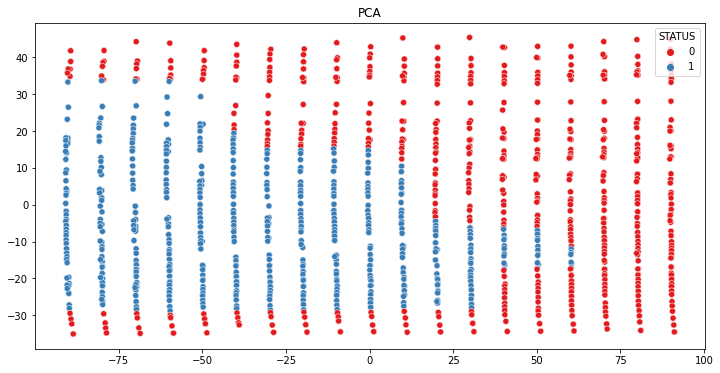

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_res[:, 0], y=pca_res[:, 1], hue=y, palette="Set1")
plt.title('PCA')

(As there are 2 classes in target, we cannot visualize lda) \
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [360]:
# lda = LDA(n_components=2)
# lda_res = lda.fit_transform(X,y)

In [407]:
X_scaled = StandardScaler().fit_transform(X)

def experiment(X,y, model):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    avg_scores = {
        'Average Accuracy': np.mean(accuracy_scores),
        'Average Precision': np.mean(precision_scores),
        'Average Recall': np.mean(recall_scores),
        'Average F1 Score': np.mean(f1_scores)
    }
    print("Average Scores-----")
    for metric, score in avg_scores.items():
        print(f"{metric}: {score}")
    return model

In [408]:
experiment(X_scaled,y,SVC(max_iter=3000))

Average Scores-----
Average Accuracy: 0.9401513414354505
Average Precision: 0.9380776340110906
Average Recall: 0.9411219286045434
Average F1 Score: 0.9395973154362416


SVC(max_iter=3000)

In [410]:
lr_model=experiment(X_scaled,y,LogisticRegression(max_iter=1000))

Average Scores-----
Average Accuracy: 0.9011694565466636
Average Precision: 0.9106198942815954
Average Recall: 0.8855140186915887
Average F1 Score: 0.8978914949064203


<AxesSubplot:ylabel='Feature'>

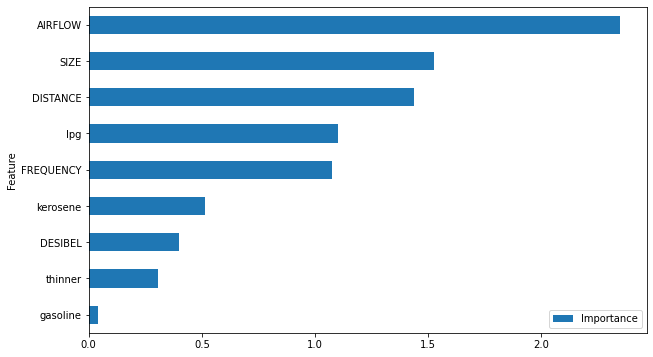

In [414]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(lr_model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

These are the coefficients of the model, but we know that p value is also important for the effect of featur to the model

In [404]:
log_model=logit(formula='STATUS~ SIZE + DISTANCE + DESIBEL +AIRFLOW +FREQUENCY+gasoline+kerosene+lpg+thinner',data=data_encoded).fit()
log_model.summary()

         Current function value: 0.230929
         Iterations: 35


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 STATUS   No. Observations:                17442
Model:                          Logit   Df Residuals:                    17432
Method:                           MLE   Df Model:                            9
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                  0.6668
Time:                        21:11:10   Log-Likelihood:                -4027.9
converged:                      False   LL-Null:                       -12090.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0036      2e+06   1.81e-09      1.000   -3.92e+06    3.92e+06
SIZE          -0.9007      0.026    -34.392      0.000      -0.952      -0.849
DISTANCE      -0.0263      0.001    -30.103      0.000      -0.028      -0.025
DESIBEL        0.0462      0.006      7.148      0.000       0.034       0.059
AIRFLOW        0.5115      0.014     37.356      0.000       0.485       0.538
FREQUENCY     -0.0501      0.003    -19.252      0.000      -0.055      -0.045
gasoline      -0.3880      2e+06  -1.94e-07      1.000   -3.92e+06    3.92e+06
kerosene      -1.6559      2e+06  -8.27e-07      1.000   -3.92e+06    3.92e+06
lpg            3.1583      2e+06   1.58e-06      1.000   -3.92e+06    3.92e+06
thinner       -1.1107      2e+06  -5.55e-07      1.000   -3.92e+06    3.92e+06
==============================================================================
"""

It looks like p value of all variables except Fuels is significant. When we look at the coefficients, each one-unit change in size will decrease the log odds of status by 0.9007 with highest coefficient.

## Q4

Use the hyperspectral image data (ROSIS sensor data over Pavia Italy) we used for Question 2 from HW1 for this question.

1. Load both the image data and the ground truth data. Reshape the image and name is as `vectors` and the ground truth data as `labels`. 
2. Remove all data points whose label is 0.
3. Write a function that construct a multi-label logistic regression model relating `vectors` to `labels`, and analyzes the accuracy using a correct statistical methodology. Analyze the accuracy results.
4. Now, run a model once over a single training and test set. Report the accuracy, precision, recall, and F1 per label basis. 
5. Repeat (3) and (4) for a multi-label SVM model.
6. Construct confusion matrices over a single run for both LR and SVM, and compare. Present your conclusions.

In [12]:
image = loadmat(r'C:\Users\user\Desktop\OKUL\BAHAR_23-24\MAT388-Data_Analysis\HW2\PaviaU.mat')['paviaU']
gt = loadmat(r'C:\Users\user\Desktop\OKUL\BAHAR_23-24\MAT388-Data_Analysis\HW2\PaviaU_gt.mat')['paviaU_gt']

In [13]:
image.shape
gt.shape

(610, 340, 103)

(610, 340)

In [76]:
indices = np.array(np.where(gt!=0)).T
vectors = image[gt!=0]
labels = gt[gt!=0]

https://people.revoledu.com/kardi/tutorial/Similarity/ChebyshevDistance.html

In [33]:
p1=np.array([1,2,3])
p2=np.array([2,5,3])
np.abs(p1 - p2)
np.max(np.abs(p1 - p2))

array([1, 3, 0])

3

In [75]:
# model=LogisticRegression(multi_class='ovr', solver='liblinear')
# X_train, X_test, y_train, y_test = train_test_split(vectors, labels, test_size=0.2, random_state=42)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

# # Calculate per-label accuracy
# label_accuracies = {}
# for label_index in np.unique(labels):
#     label_accuracy = accuracy_score(y_test[y_test==label_index], y_pred[y_test==label_index])
#     label_accuracies[label_index]=label_accuracy

# # Print per-label accuracy for Logistic Regression
# print("Logistic Regression Per-Label Accuracy:")
# label_accuracies

In [77]:
def construct_model(vectors, labels,model_p,iter=5):
    avg_acc_per_label=[]
    avg_acc=[]
    avg_prec=[]
    avg_recall=[]
    avg_f1=[]
    key_sums={}
    for i in range(iter):
        X_train, X_test, y_train, y_test = train_test_split(vectors, labels, test_size=0.2, random_state=42)
        if model_p=='LR':
            model=LogisticRegression(multi_class='ovr', solver='liblinear',max_iter=1000)
        elif model_p=='SVM':
            model = OneVsRestClassifier(SVC(kernel="linear"))
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        # Calculate per-label accuracy
        label_accuracies = {}
        for label_index in np.unique(labels):
            label_accuracy = accuracy_score(y_test[y_test==label_index], y_pred[y_test==label_index])
            label_accuracies[label_index]=label_accuracy
        avg_acc_per_label.append(label_accuracies)
        avg_acc.append(accuracy_score(y_test, y_pred))
            # Precision, Recall, and F1-score per label basis
        avg_prec.append(precision_score(y_test, y_pred))
        avg_recall.append(recall_score(y_test, y_pred))
        avg_f1.append(f1_score(y_test, y_pred))
    for item in avg_acc_per_label:
        for key, value in item.items():
            key_sums[key] += value
    average_acc_values = {key: key_sums[key] / iter for key in key_sums}
    
    mean_accuracy = np.mean(avg_acc)
    mean_precision = np.mean(avg_prec, axis=0)
    mean_recall = np.mean(avg_recall, axis=0)
    mean_f1 = np.mean(avg_f1, axis=0)

    return average_acc_values,mean_accuracy,mean_precision,mean_recall,mean_f1

ALTTA HATA VAR

In [78]:
# construct_model(vectors, labels,'LR',iter=5)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


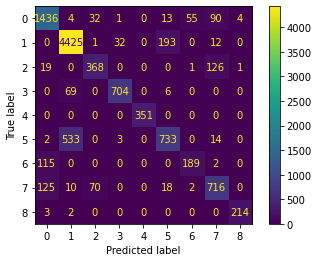

In [37]:
def lin_experiment(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

res = lin_experiment(vectors,labels,LogisticRegression(max_iter=1000))
ConfusionMatrixDisplay(res).plot()

In [74]:
def getCM(X,y,model,test_size=0.2,train_size=0.8):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,train_size=train_size)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    confusion_matrices = multilabel_confusion_matrix(y_test, y_predict)
    return classification_report(y_test,y_predict),confusion_matrices

def plot_multilabel_confusion_matrix(confusion_matrices, model_name):
    num_classes = len(confusion_matrices)

    fig, axes = plt.subplots(num_classes, 1, figsize=(8, 5 * num_classes))

    for i, cm in enumerate(confusion_matrices):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for Class {i+1}')

    fig.suptitle(f'Multi-label Confusion Matrix for {model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

### One-time LR & SVM

In [82]:
lr_report,lr_conf=getCM(vectors,labels,LogisticRegression(max_iter=1500))
print(lr_report)

              precision    recall  f1-score   support

           1       0.85      0.88      0.86      1278
           2       0.88      0.95      0.92      3762
           3       0.80      0.70      0.75       401
           4       0.94      0.91      0.93       677
           5       1.00      1.00      1.00       276
           6       0.79      0.55      0.65       995
           7       0.79      0.64      0.71       275
           8       0.72      0.79      0.75       710
           9       0.99      0.98      0.99       182

    accuracy                           0.86      8556
   macro avg       0.86      0.82      0.84      8556
weighted avg       0.86      0.86      0.85      8556



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
svc_report,svc_conf=getCM(vectors,labels,SVC(max_iter=1500))
print(svc_report)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.82      0.94      0.87      1308
           2       0.91      0.21      0.35      3753
           3       0.87      0.56      0.68       443
           4       0.98      0.91      0.94       605
           5       0.99      0.99      0.99       269
           6       0.23      0.89      0.37      1011
           7       0.91      0.50      0.64       270
           8       0.76      0.94      0.84       708
           9       1.00      1.00      1.00       189

    accuracy                           0.58      8556
   macro avg       0.83      0.77      0.74      8556
weighted avg       0.81      0.58      0.57      8556



### Confusion Matrices

In [ ]:
plot_multilabel_confusion_matrix(lr_conf, 'Logistic Regression')

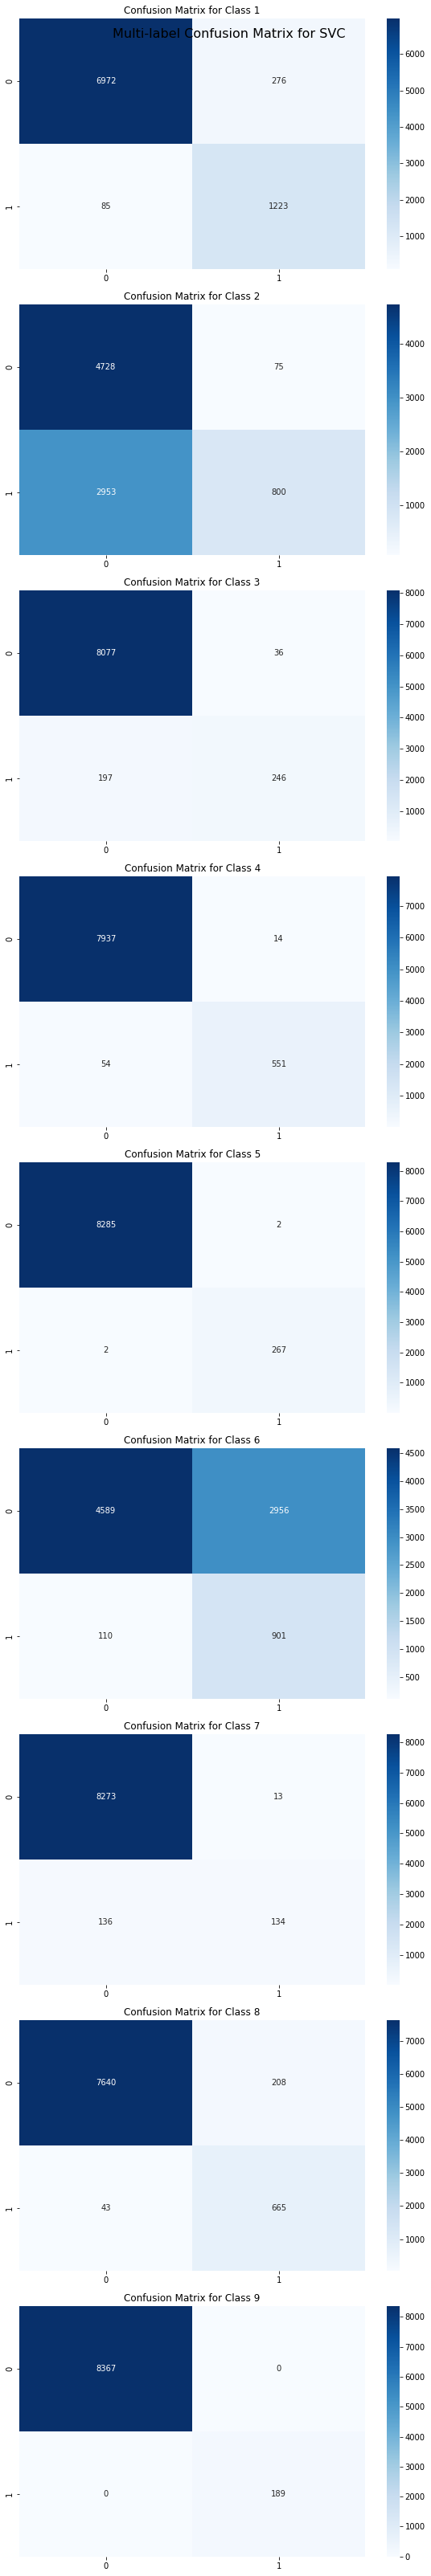

In [81]:
plot_multilabel_confusion_matrix(svc_conf, 'SVC')